In [ ]:
import pandas as pd

airbnb = pd.read_csv(r'C:\Users\gabriel.lima\airbnb\listings.csv')

print(airbnb.neighbourhood.drop_duplicates())

0                      Hackney
1                  Westminster
2         Barking and Dagenham
3       Hammersmith and Fulham
4                    Islington
5       Kensington and Chelsea
6                    Southwark
7                      Lambeth
8                       Camden
12                  Wandsworth
13                  Hillingdon
16               Tower Hamlets
17                      Barnet
19        Richmond upon Thames
25                   Greenwich
29                    Haringey
30                      Merton
34                       Brent
42                      Newham
48              Waltham Forest
51                    Hounslow
56                     Croydon
86                    Lewisham
131                    Enfield
133             City of London
156                     Ealing
160                    Bromley
166                   Havering
242                     Harrow
266       Kingston upon Thames
326                  Redbridge
595                     Bexley
1089    

In [ ]:
import pandas as pd
#criando um dic que ajustam bairros em regioes
#lista de bairros do airbnb londres
bairros = [
    'Hackney', 'Westminster', 'Barking and Dagenham', 'Hammersmith and Fulham',
    'Islington', 'Kensington and Chelsea', 'Southwark', 'Lambeth', 'Camden',
    'Wandsworth', 'Hillingdon', 'Tower Hamlets', 'Barnet', 'Richmond upon Thames',
    'Greenwich', 'Haringey', 'Merton', 'Brent', 'Newham', 'Waltham Forest',
    'Hounslow', 'Croydon', 'Lewisham', 'Enfield', 'City of London', 'Ealing',
    'Bromley', 'Havering', 'Harrow', 'Kingston upon Thames', 'Redbridge',
    'Bexley', 'Sutton'
]


mapeamento_categorias = {
    'Hackney': 'Leste de Londres',
    'Barking and Dagenham': 'Leste de Londres',
    'Tower Hamlets': 'Leste de Londres',
    'Newham': 'Leste de Londres',
    'Waltham Forest': 'Leste de Londres',
    'Greenwich': 'Sul de Londres',
    'Lewisham': 'Sul de Londres',
    'Southwark': 'Sul de Londres',
    'Lambeth': 'Sul de Londres',
    'Croydon': 'Sul de Londres',
    'Merton': 'Sul de Londres',
    'Bexley': 'Sul de Londres',
    'Bromley': 'Sul de Londres',
    'Kingston upon Thames': 'Sul de Londres',
    'Havering': 'Leste de Londres',
    'Redbridge': 'Leste de Londres',
    'Harrow': 'Oeste de Londres',
    'Hounslow': 'Oeste de Londres',
    'Hillingdon': 'Oeste de Londres',
    'Ealing': 'Oeste de Londres',
    'Barnet': 'Norte de Londres',
    'Enfield': 'Norte de Londres',
    'Camden': 'Central de Londres',
    'Islington': 'Central de Londres',
    'Kensington and Chelsea': 'Central de Londres',
    'Westminster': 'Central de Londres',
    'City of London': 'Central de Londres',
    'Wandsworth': 'Sul de Londres',
    'Richmond upon Thames': 'Sul de Londres',
    'Hammersmith and Fulham': 'Oeste de Londres',
    'Kensington and Chelsea': 'Central de Londres',
    'Westminster': 'Central de Londres',
    'Haringey': 'Norte de Londres',
    'Sutton': 'Sul de Londres'
}

df = pd.DataFrame({'Bairro': bairros})
df['Categoria'] = df['Bairro'].map(mapeamento_categorias)



                    Bairro           Categoria
0                  Hackney    Leste de Londres
1              Westminster  Central de Londres
2     Barking and Dagenham    Leste de Londres
3   Hammersmith and Fulham    Oeste de Londres
4                Islington  Central de Londres
5   Kensington and Chelsea  Central de Londres
6                Southwark      Sul de Londres
7                  Lambeth      Sul de Londres
8                   Camden  Central de Londres
9               Wandsworth      Sul de Londres
10              Hillingdon    Oeste de Londres
11           Tower Hamlets    Leste de Londres
12                  Barnet    Norte de Londres
13    Richmond upon Thames      Sul de Londres
14               Greenwich      Sul de Londres
15                Haringey    Norte de Londres
16                  Merton      Sul de Londres
17                   Brent                 NaN
18                  Newham    Leste de Londres
19          Waltham Forest    Leste de Londres
20           

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

([0, 1, 2, 3],
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Hotel room'),
  Text(2, 0, 'Private room'),
  Text(3, 0, 'Shared room')])

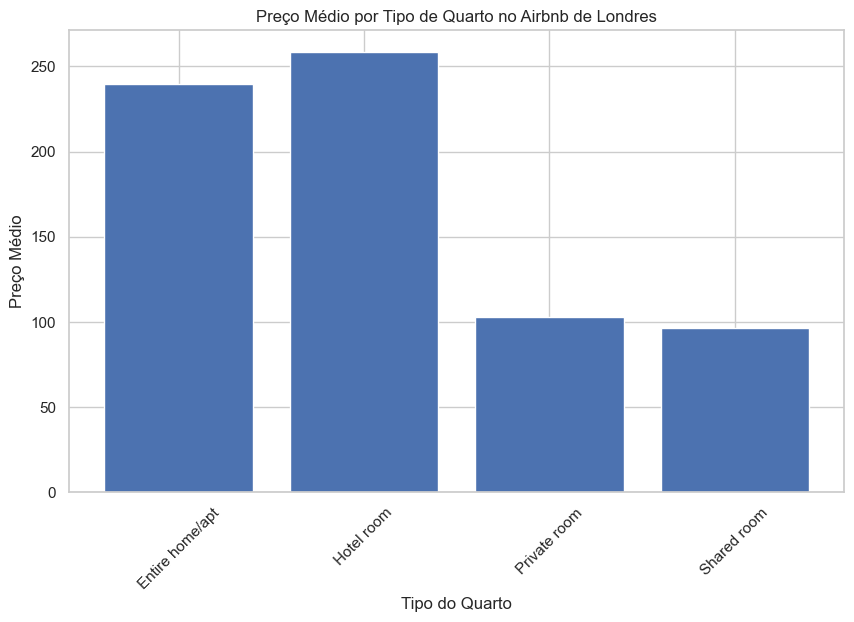

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def calcular_preco_medio_por_tipo_de_quarto(dataframe):
    # agrupando os dois dados que vão ser trabalhados em uma so coluna
    preco_medio_por_tipo = dataframe.groupby('room_type')['price'].mean().reset_index()

    # renomeando a coluna price por preco medio
    preco_medio_por_tipo.rename(columns={'price': 'preco_medio'}, inplace=True)

    return preco_medio_por_tipo



# chama a função declarada para calcular o preço médio do arquivo csv
preco_medio_por_tipo = calcular_preco_medio_por_tipo_de_quarto(airbnb_listings)

#plotar o gráfico em barras
plt.figure(figsize=(10,6)) # definindo tamnaho do gráfico

# configura as barras paras os doisa dados do grafico
plt.bar(preco_medio_por_tipo['room_type'], preco_medio_por_tipo['preco_medio'])

# add rótulos dos gráficos e o título
plt.xlabel('Tipo do Quarto')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Tipo de Quarto no Airbnb de Londres')

# rotacionando os rótulos do eixo X para melhor vizualização
plt.xticks(rotation=45)


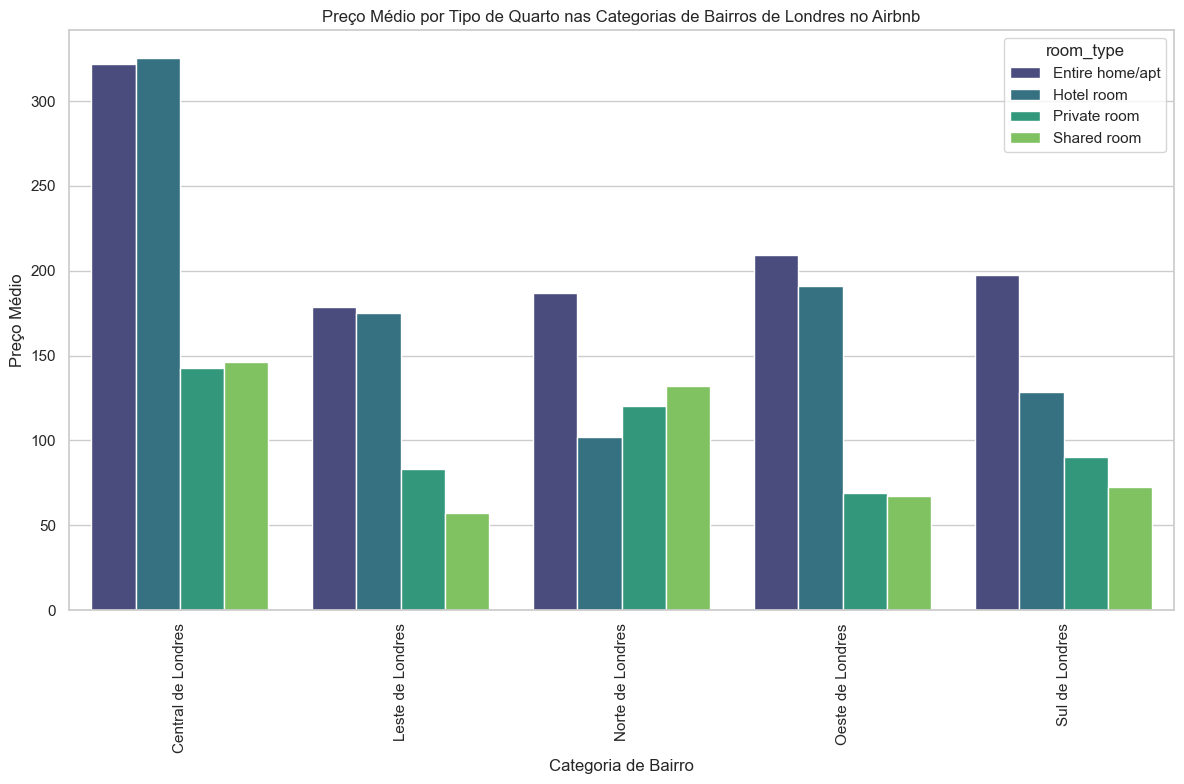

In [ ]:
def calc_preco_quarto_loc(dataframe, neighbourhood):

    dataframe['categoria'] = dataframe['neighbourhood'].map(mapeamento_categorias)

    preco_quarto_loc = dataframe.groupby(['room_type', 'categoria'])['price'].mean().reset_index()

    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    sns.barplot(x='categoria', y='price', hue='room_type', data=preco_quarto_loc, palette='viridis')

    plt.xlabel('Categoria de Bairro')
    plt.ylabel('Preço Médio')
    plt.title('Preço Médio por Tipo de Quarto nas Categorias de Bairros de Londres no Airbnb')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

airbnb_listings = pd.read_csv(r'C:\Users\gabriel.lima\airbnb\listings.csv')

coluna_localizacao = 'neighbourhood'
calc_preco_quarto_loc(airbnb_listings, coluna_localizacao)


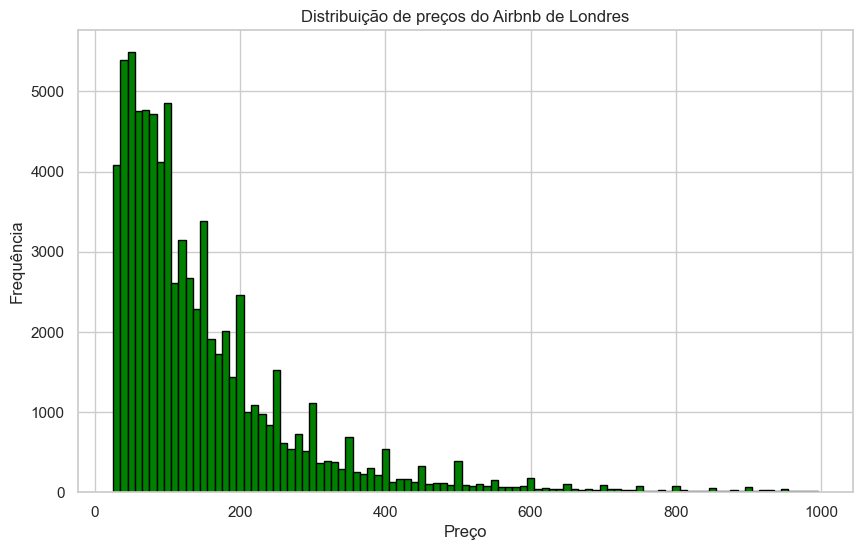

In [ ]:

airbnb_listings = pd.read_csv(r'C:\Users\gabriel.lima\airbnb\listings.csv')

precos = airbnb_listings['price']

bins = [x for x in range(25,1000,10)]

plt.figure(figsize=(10,6))

plt.hist(precos, bins=bins, color='green', edgecolor='black')

plt.xlabel("Preço")
plt.ylabel('Frequência')
plt.title('Distribuição de preços do Airbnb de Londres')

plt.show()

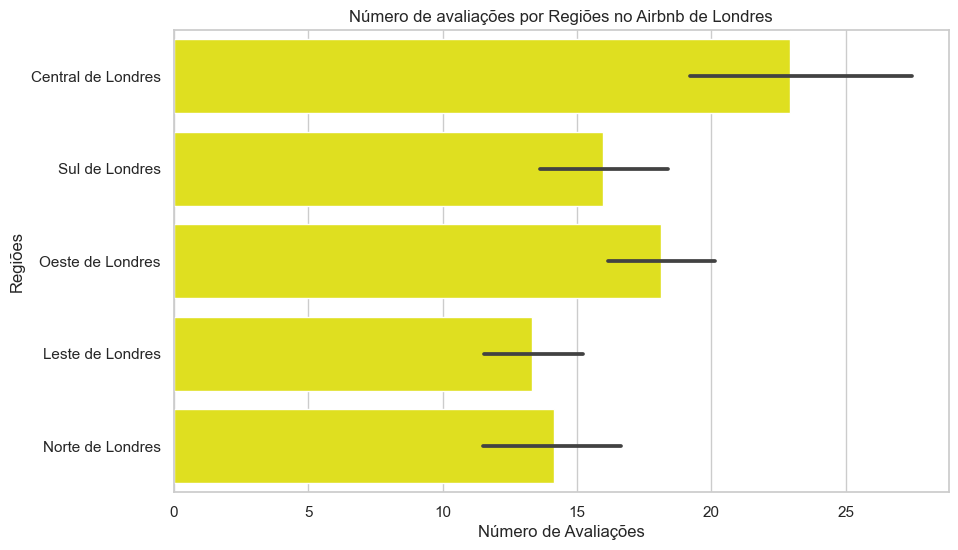

In [ ]:

airbnb_listings = pd.read_csv(r'C:\Users\gabriel.lima\airbnb\listings.csv')

mapeamento_bairros = {
    'Hackney': 'Leste de Londres',
    'Barking and Dagenham': 'Leste de Londres',
    'Tower Hamlets': 'Leste de Londres',
    'Newham': 'Leste de Londres',
    'Waltham Forest': 'Leste de Londres',
    'Greenwich': 'Sul de Londres',
    'Lewisham': 'Sul de Londres',
    'Southwark': 'Sul de Londres',
    'Lambeth': 'Sul de Londres',
    'Croydon': 'Sul de Londres',
    'Merton': 'Sul de Londres',
    'Bexley': 'Sul de Londres',
    'Bromley': 'Sul de Londres',
    'Kingston upon Thames': 'Sul de Londres',
    'Havering': 'Leste de Londres',
    'Redbridge': 'Leste de Londres',
    'Harrow': 'Oeste de Londres',
    'Hounslow': 'Oeste de Londres',
    'Hillingdon': 'Oeste de Londres',
    'Ealing': 'Oeste de Londres',
    'Barnet': 'Norte de Londres',
    'Enfield': 'Norte de Londres',
    'Camden': 'Central de Londres',
    'Islington': 'Central de Londres',
    'Kensington and Chelsea': 'Central de Londres',
    'Westminster': 'Central de Londres',
    'City of London': 'Central de Londres',
    'Wandsworth': 'Sul de Londres',
    'Richmond upon Thames': 'Sul de Londres',
    'Hammersmith and Fulham': 'Oeste de Londres',
    'Kensington and Chelsea': 'Central de Londres',
    'Westminster': 'Central de Londres',
    'Haringey': 'Norte de Londres',
    'Sutton': 'Sul de Londres'
}


avaliacoes_bairro = airbnb_listings.groupby('neighbourhood')['number_of_reviews', ].mean().reset_index()

avaliacoes_bairro['neighbourhood'] = avaliacoes_bairro['neighbourhood'].map(mapeamento_bairros)

avaliacoes_bairro = avaliacoes_bairro.sort_values(by='number_of_reviews', ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

sns.barplot(x='number_of_reviews', y='neighbourhood', data =avaliacoes_bairro, color='yellow')

plt.xlabel('Número de Avaliações')
plt.ylabel('Regiões')
plt.title('Número de avaliações por Regiões no Airbnb de Londres')

plt.show()


C:\Users\gabriel.lima\AppData\Local\Temp\ipykernel_7236\1223148421.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_para_grafico['categoria'] = dados_para_grafico['neighbourhood'].map(mapeamento_categorias)
C:\Users\gabriel.lima\AppData\Local\Temp\ipykernel_7236\1223148421.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_para_grafico['categoria_numerica'] = pd.Categorical(dados_para_grafico['categoria']).codes
C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: Runti

[Text(0, 0, 'Leste de Londres'),
 Text(1, 0, 'Central de Londres'),
 Text(2, 0, 'Oeste de Londres'),
 Text(3, 0, 'Sul de Londres'),
 Text(4, 0, 'Norte de Londres'),
 Text(5, 0, 'nan')]

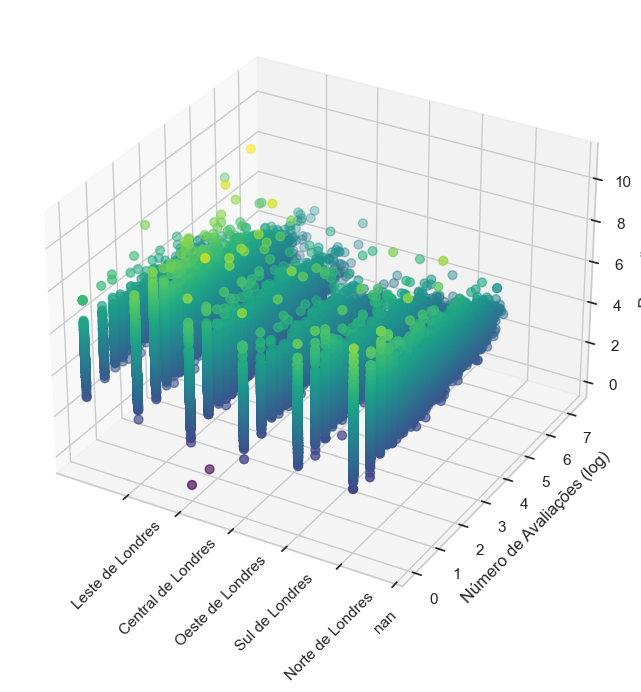

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

airbnb_listings = pd.read_csv(r'C:\Users\gabriel.lima\airbnb\listings.csv')

dados_para_grafico = airbnb_listings[['neighbourhood', 'number_of_reviews', 'price']]


mapeamento_categorias = {
    'Hackney': 'Leste de Londres',
    'Barking and Dagenham': 'Leste de Londres',
    'Tower Hamlets': 'Leste de Londres',
    'Newham': 'Leste de Londres',
    'Waltham Forest': 'Leste de Londres',
    'Greenwich': 'Sul de Londres',
    'Lewisham': 'Sul de Londres',
    'Southwark': 'Sul de Londres',
    'Lambeth': 'Sul de Londres',
    'Croydon': 'Sul de Londres',
    'Merton': 'Sul de Londres',
    'Bexley': 'Sul de Londres',
    'Bromley': 'Sul de Londres',
    'Kingston upon Thames': 'Sul de Londres',
    'Havering': 'Leste de Londres',
    'Redbridge': 'Leste de Londres',
    'Harrow': 'Oeste de Londres',
    'Hounslow': 'Oeste de Londres',
    'Hillingdon': 'Oeste de Londres',
    'Ealing': 'Oeste de Londres',
    'Barnet': 'Norte de Londres',
    'Enfield': 'Norte de Londres',
    'Camden': 'Central de Londres',
    'Islington': 'Central de Londres',
    'Kensington and Chelsea': 'Central de Londres',
    'Westminster': 'Central de Londres',
    'City of London': 'Central de Londres',
    'Wandsworth': 'Sul de Londres',
    'Richmond upon Thames': 'Sul de Londres',
    'Hammersmith and Fulham': 'Oeste de Londres',
    'Kensington and Chelsea': 'Central de Londres',
    'Westminster': 'Central de Londres',
    'Haringey': 'Norte de Londres',
    'Sutton': 'Sul de Londres'
}

dados_para_grafico['categoria'] = dados_para_grafico['neighbourhood'].map(mapeamento_categorias)

dados_para_grafico['categoria_numerica'] = pd.Categorical(dados_para_grafico['categoria']).codes

dados_para_grafico['log_num_avaliacoes'] = np.log(dados_para_grafico['number_of_reviews'])
dados_para_grafico['log_preco'] = np.log(dados_para_grafico['price'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

categorias_numericas = dados_para_grafico['categoria_numerica']
log_num_avaliacoes = dados_para_grafico['log_num_avaliacoes']
log_precos = dados_para_grafico['log_preco']

scatter = ax.scatter(categorias_numericas, log_num_avaliacoes, log_precos, c=log_precos, cmap='viridis', s=40)


ax.set_ylabel('Número de Avaliações (log)')
ax.set_zlabel('Preço (log)')


ax.set_xticks(np.arange(len(categorias_numericas.unique())))
ax.set_xticklabels(dados_para_grafico['categoria'].unique(), rotation=45)
